In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year_Extracted'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Location Description'] = df['Location Description'].fillna('Unknown')

df = df.drop_duplicates()
df = df.drop(columns=['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'])
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,Year,Updated On,Year_Extracted,Month,Day,Hour
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,1.0,42.0,32.0,11,2015,08/01/2017 03:52:26 PM,2015,3,18,12
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,25.0,36.0,19.0,11,2018,04/06/2019 04:04:43 PM,2018,12,20,15
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,Unknown,False,False,...,8.0,15.0,63.0,11,2016,04/06/2019 04:04:43 PM,2016,5,1,0
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,17.0,33.0,14.0,08A,2018,04/06/2019 04:04:43 PM,2018,12,20,16
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,22.0,21.0,71.0,11,2014,04/06/2019 04:04:43 PM,2014,6,1,0


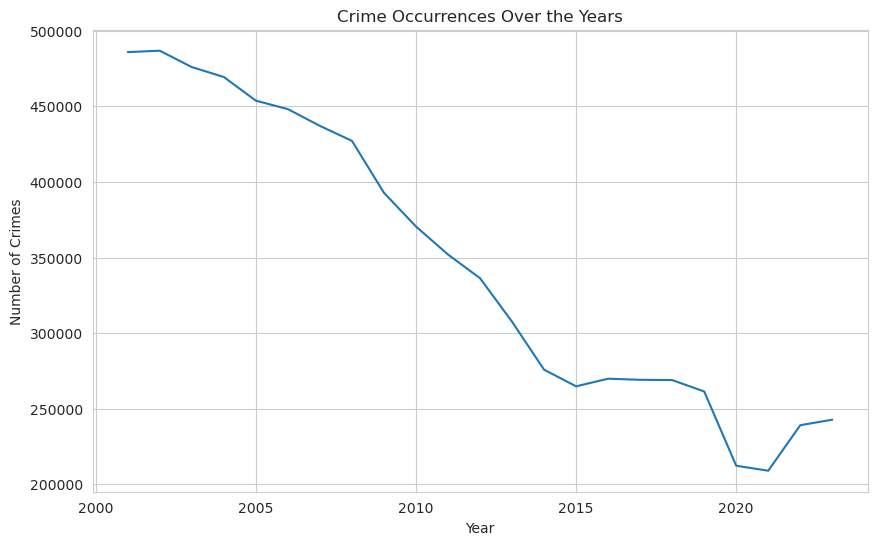

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Temporal Trends: Crimes over the Years
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Crime Occurrences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

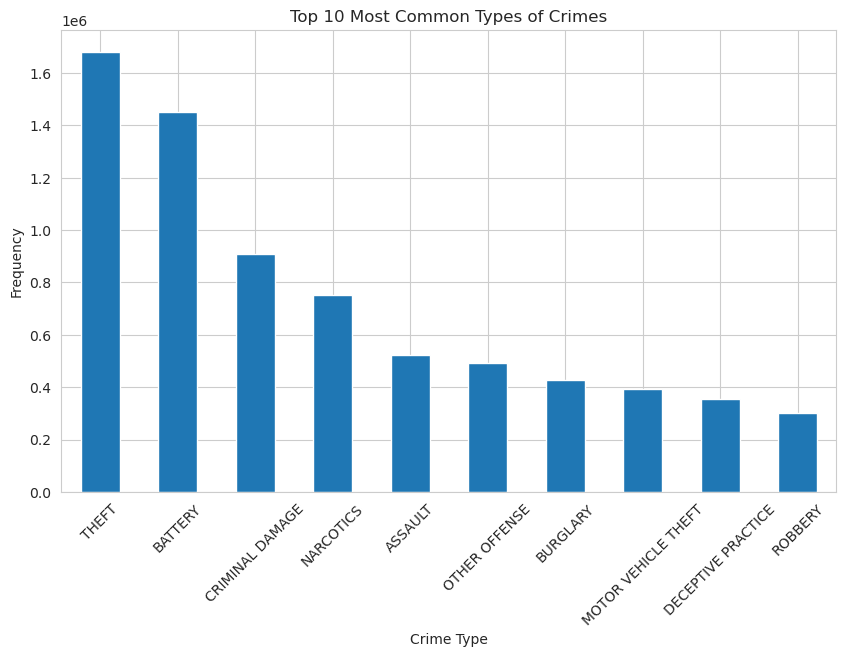

In [9]:
# 2. Crime Types and Frequencies
plt.figure(figsize=(10, 6))
df['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Types of Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

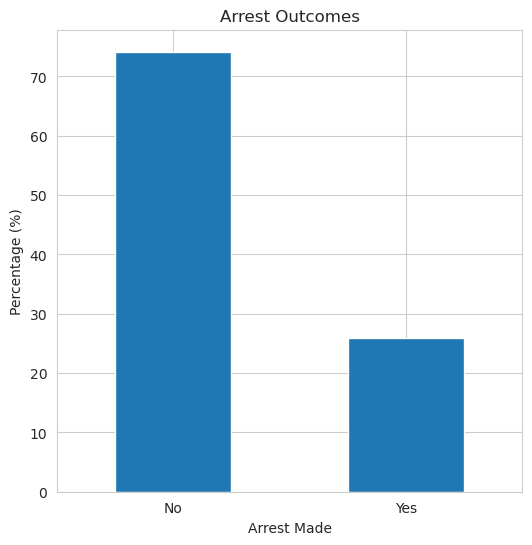

In [10]:
# 3. Arrest Outcomes
arrest_rates = df['Arrest'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
arrest_rates.plot(kind='bar')
plt.title('Arrest Outcomes')
plt.xlabel('Arrest Made')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

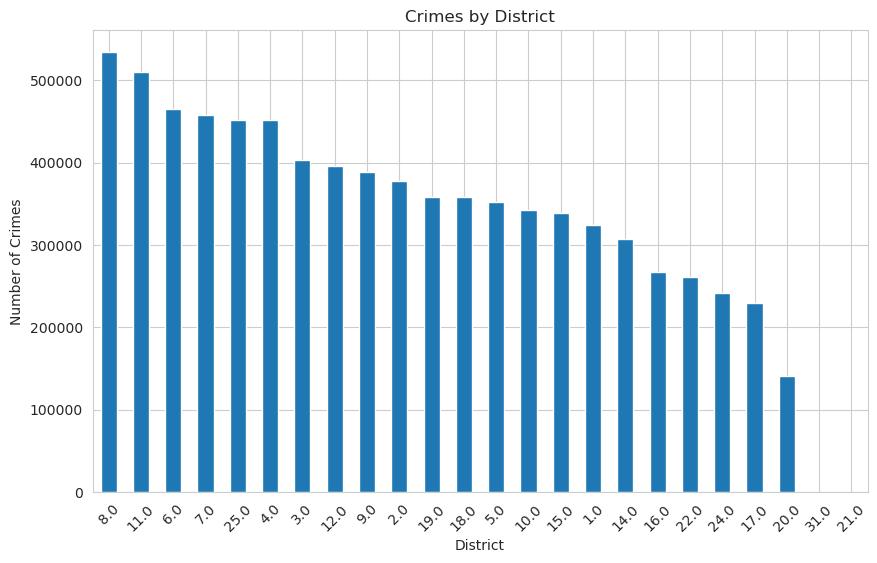

In [11]:
# 4. Spatial Distribution: Crimes by District
plt.figure(figsize=(10, 6))
df['District'].value_counts().plot(kind='bar')
plt.title('Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

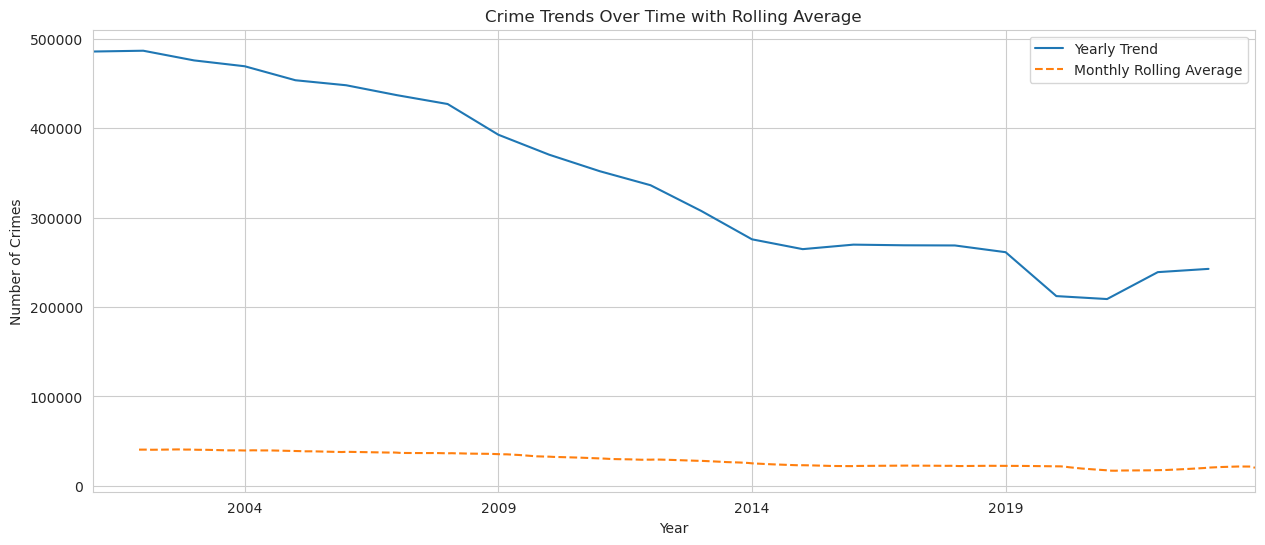

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'df' is your DataFrame after preprocessing and contains the full dataset
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the count of crimes per year
yearly_data = df.groupby(df['Date'].dt.to_period("Y")).size()

# If the last year is incomplete, remove it from the analysis
if yearly_data.index[-1].year == pd.to_datetime("now").year:
    yearly_data = yearly_data[:-1]

# Calculate the count of crimes per month
monthly_data = df.groupby(df['Date'].dt.to_period("M")).size()

# Apply a rolling window of 12 months to the monthly data
monthly_rolling = monthly_data.rolling(window=12).mean()

# Plot the trends over time
plt.figure(figsize=(15, 6))
yearly_data.plot(kind='line', label='Yearly Trend')
monthly_rolling.plot(kind='line', linestyle='--', label='Monthly Rolling Average')
plt.title('Crime Trends Over Time with Rolling Average')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

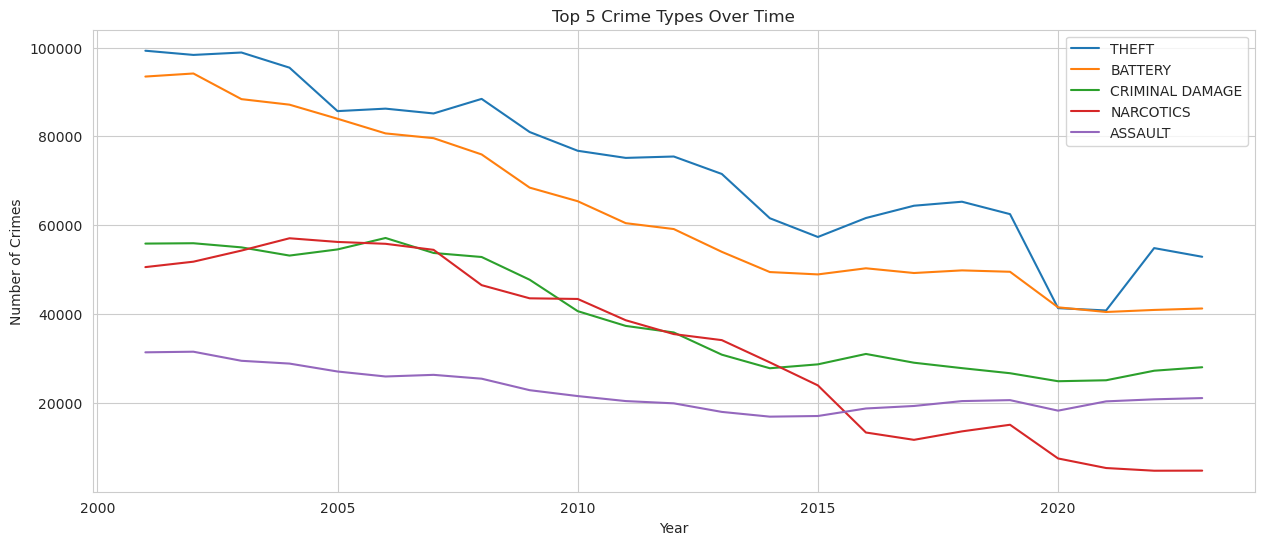

In [13]:
# 2. Crime Type Distribution Over Time
top_crimes = df['Primary Type'].value_counts().head(5).index.tolist()
plt.figure(figsize=(15, 6))
for crime in top_crimes:
    subset = df[df['Primary Type'] == crime]
    subset.groupby([subset['Date'].dt.year]).size().plot(label=crime)
plt.title('Top 5 Crime Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

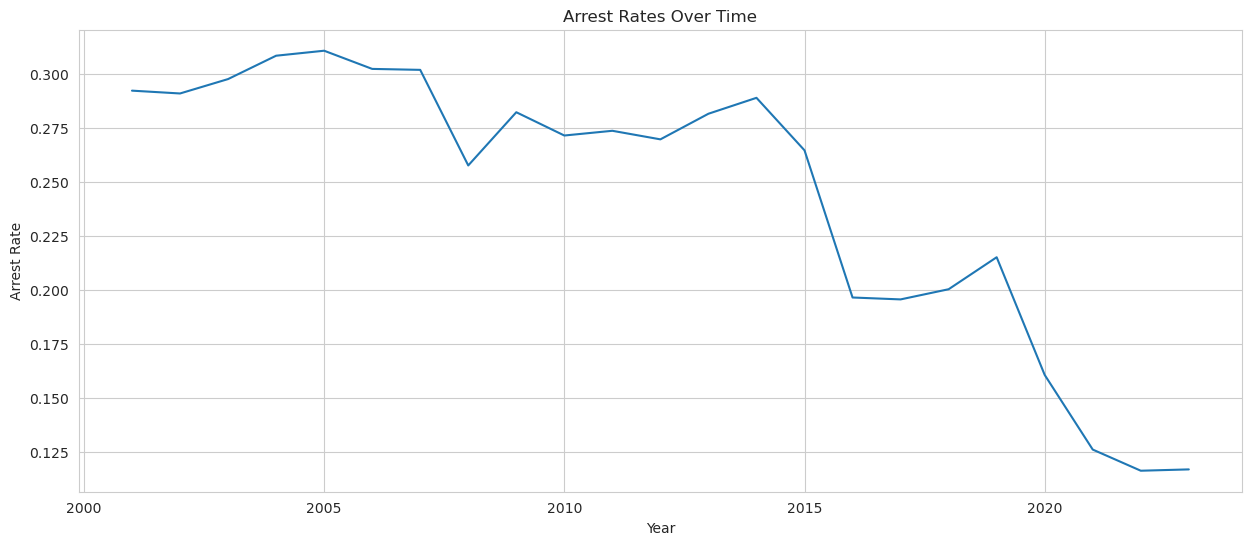

In [14]:
# 3. Arrest Outcomes Over Time
plt.figure(figsize=(15, 6))
df.groupby([df['Date'].dt.year])['Arrest'].mean().plot(kind='line')
plt.title('Arrest Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.show()

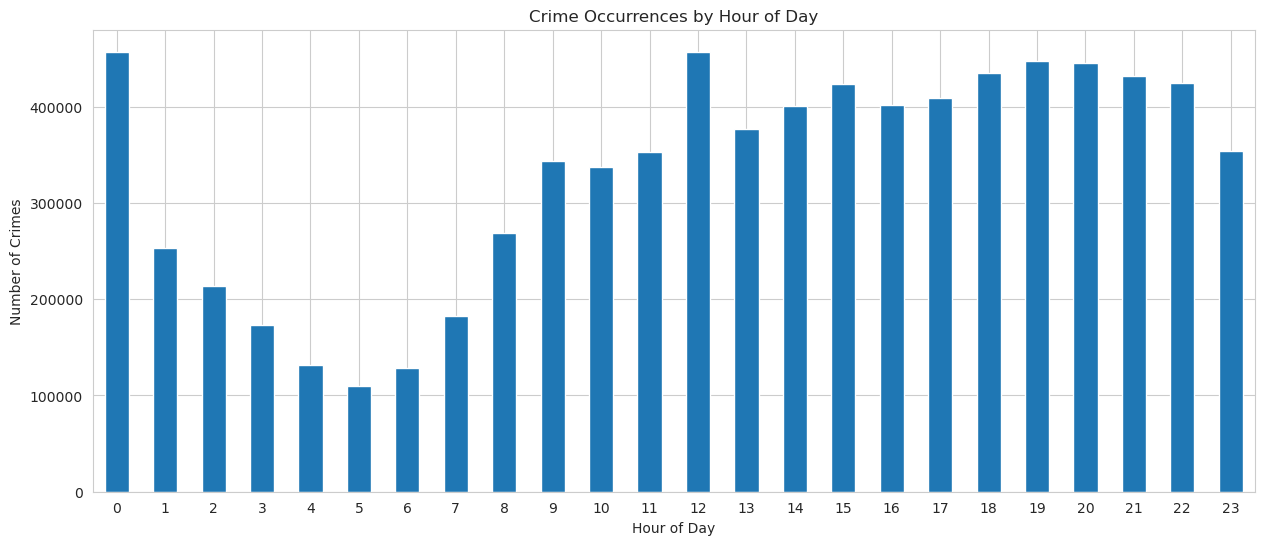

In [15]:
# 4. Analysis of Crimes by Hour of Day
plt.figure(figsize=(15, 6))
df.groupby(df['Date'].dt.hour).size().plot(kind='bar')
plt.title('Crime Occurrences by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

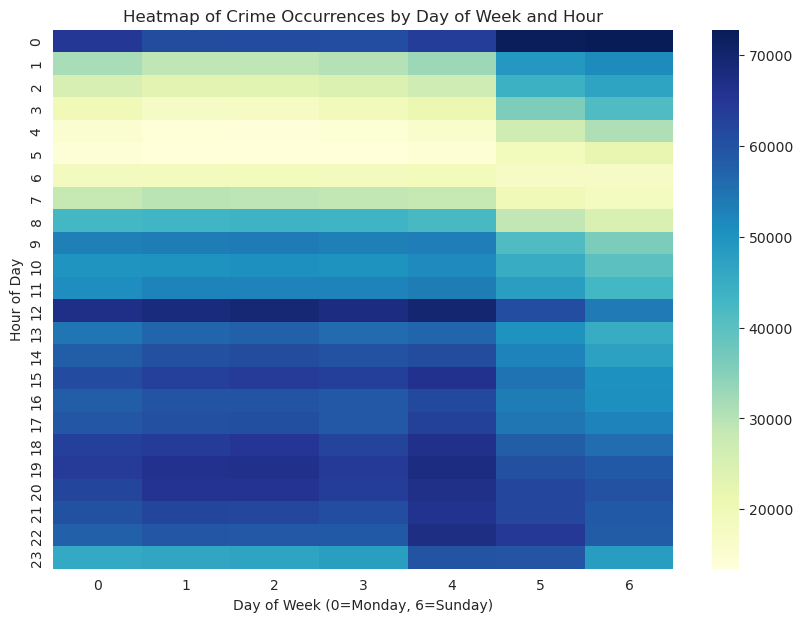

In [16]:
# 5. Heatmap of Crimes by Day of Week and Hour
plt.figure(figsize=(10, 7))
pivot_table = df.pivot_table(values='ID', index=df['Date'].dt.hour, columns=df['Date'].dt.dayofweek, aggfunc='count')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Crime Occurrences by Day of Week and Hour')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of Day')
plt.show()

In [28]:
# Basic Descriptive Statistics
descriptive_stats = df.describe()

# Frequency of crimes by type
crime_type_counts = df['Primary Type'].value_counts()

# Arrest rates
arrest_rates = df['Arrest'].value_counts(normalize=True)


In [32]:
from scipy import stats

# Ensure the 'Arrest' column is binary (0 or 1) or convert it to numeric if it's boolean
df['Arrest'] = df['Arrest'].astype(int)

# Calculate Pearson correlation coefficient between 'Hour' and 'Arrest'
pearson_coef, p_value = stats.pearsonr(df['Hour'], df['Arrest'])

# Display the Pearson correlation coefficient and the p-value
print(f"Pearson Correlation Coefficient: {pearson_coef}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.0813952349794726
P-value: 0.0


In [38]:
# Assuming 'df' is your DataFrame and it's already loaded
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate the correlation matrix


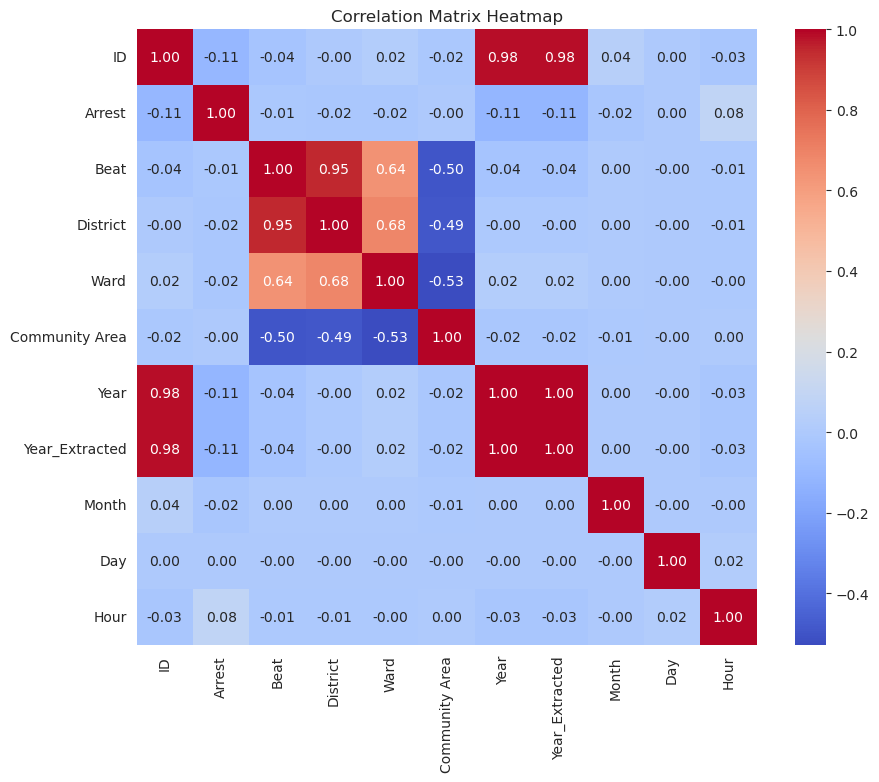

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
